In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [5]:
print(df.info)
print(df.describe)

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  ...  IsActiveMember EstimatedSalary Exited
0             1    15634602   Hargrave  ...               1       101348.88      1
1             2    15647311       Hill  ...               1       112542.58      0
2             3    15619304       Onio  ...               0       113931.57      1
3             4    15701354       Boni  ...               0        93826.63      0
4             5    15737888   Mitchell  ...               1        79084.10      0
...         ...         ...        ...  ...             ...             ...    ...
9995       9996    15606229   Obijiaku  ...               0        96270.64      0
9996       9997    15569892  Johnstone  ...               1       101699.77      0
9997       9998    15584532        Liu  ...               1        42085.58      1
9998       9999    15682355  Sabbatini  ...               0        92888.52      1
9999      10000    15628319     Walker  ...            

In [6]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [7]:
le_geo = LabelEncoder()
le_gender = LabelEncoder()

In [8]:

df['Geography'] = le_geo.fit_transform(df['Geography'])
df['Gender'] = le_gender.fit_transform(df['Gender'])

In [9]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [10]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [12]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
search.fit(X_train, y_train)

best_model = search.best_estimator_
print("🔹 Best Parameters:", search.best_params_)


🔹 Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}


In [15]:
y_pred = best_model.predict(X_test)

In [16]:

print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.867
 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



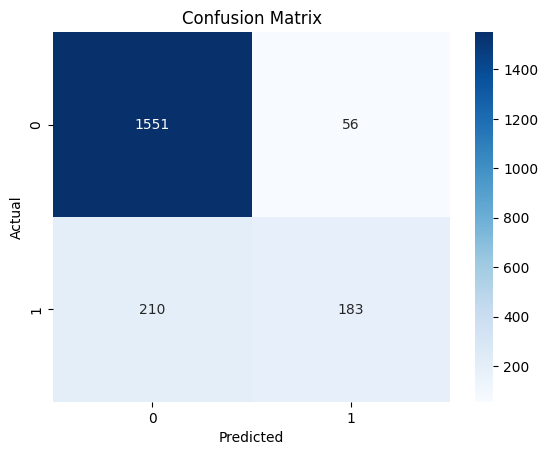

In [17]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
